Unit-1

In [1]:
import os
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm

# Base paths
base_dir = r"C:\Users\Dell\Downloads\cv-corpus-21.0-delta-2025-03-14-en\cv-corpus-21.0-delta-2025-03-14\en"
audio_dir = os.path.join(base_dir, "clips")

# Get all TSV files in the folder
tsv_files = [f for f in os.listdir(base_dir) if f.endswith(".tsv")]

# Collect all extracted data
all_data = []

# Track skipped files
skipped_files = []

for tsv_file in tsv_files:
    tsv_path = os.path.join(base_dir, tsv_file)
    print(f"\nProcessing {tsv_file}...")

    try:
        metadata = pd.read_csv(tsv_path, sep='\t')
    except Exception as e:
        print(f"Error reading {tsv_file}: {e}")
        skipped_files.append((tsv_file, "read_error"))
        continue

    if 'path' not in metadata.columns:
        print(f"Skipping {tsv_file} — no 'path' column.")
        skipped_files.append((tsv_file, "no_path_column"))
        continue

    for _, row in tqdm(metadata.iterrows(), total=len(metadata)):
        file_name = row['path']
        full_path = os.path.join(audio_dir, file_name)

        try:
            y, sr = librosa.load(full_path, sr=16000)
            duration = librosa.get_duration(y=y, sr=sr)
            mfcc = librosa.feature.mfcc(y=y, sr=sr)
            pitch = librosa.yin(y, fmin=50, fmax=300)
            energy = np.sum(y**2) / len(y)
            snr_estimate = 10 * np.log10(np.mean(y**2) / (np.var(y - np.mean(y)) + 1e-8))

            all_data.append({
                "tsv_file": tsv_file,
                "file_path": full_path,
                "audio_file": file_name,
                "client_id": row.get("client_id", "unknown"),
                "sentence": row.get("sentence", "unknown"),
                "gender": row.get("gender", row.get("sex", "unknown")),
                "accent": row.get("accent", row.get("accents", "unknown")),
                "duration_sec": duration,
                "mfcc_mean": mfcc.mean(),
                "pitch_mean": pitch.mean(),
                "energy": energy,
                "snr_db": snr_estimate
    })


        except Exception as e:
            print(f"Error processing {full_path}: {e}")

# Convert to DataFrame
df = pd.DataFrame(all_data)
df["label"] = df["snr_db"].apply(lambda x: "clean" if x > 10 else "noisy")
df.to_csv("audio_features_metadata_unit1_all_tsv.csv", index=False)
print("\n✅ Done: Extracted and saved features from all applicable TSV files.")

# Optionally log skipped files
if skipped_files:
    print("\n⚠️ Skipped files:")
    for fname, reason in skipped_files:
        print(f" - {fname} ({reason})")




Processing clip_durations.tsv...
Skipping clip_durations.tsv — no 'path' column.

Processing invalidated.tsv...


100%|██████████| 39/39 [00:13<00:00,  3.00it/s]



Processing other.tsv...


 78%|███████▊  | 16681/21499 [13:51<02:44, 29.34it/s]C:\Users\Dell\AppData\Local\Temp\ipykernel_11416\2501039633.py:46: RuntimeWarning: divide by zero encountered in log10
  snr_estimate = 10 * np.log10(np.mean(y**2) / (np.var(y - np.mean(y)) + 1e-8))
100%|██████████| 21499/21499 [17:09<00:00, 20.89it/s]



Processing reported.tsv...
Skipping reported.tsv — no 'path' column.

Processing unvalidated_sentences.tsv...
Skipping unvalidated_sentences.tsv — no 'path' column.

Processing validated.tsv...


100%|██████████| 249/249 [00:09<00:00, 26.06it/s]



Processing validated_sentences.tsv...
Skipping validated_sentences.tsv — no 'path' column.

✅ Done: Extracted and saved features from all applicable TSV files.

⚠️ Skipped files:
 - clip_durations.tsv (no_path_column)
 - reported.tsv (no_path_column)
 - unvalidated_sentences.tsv (no_path_column)
 - validated_sentences.tsv (no_path_column)


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("audio_features_metadata_unit1_all_tsv.csv")

In [3]:
df

,tsv_file,file_path,audio_file,client_id,sentence,gender,accent,duration_sec,mfcc_mean,pitch_mean,energy,snr_db,label
0,invalidated.tsv,C:\Users\Dell\Downloads\cv-corpus-21.0-delta-2...,common_voice_en_41917351.mp3,403c1ec9623855b620b043ca2ca76c02989e679e32ba27...,The previous inauguration date was in early May.,female_feminine,nigerian accent,4.716,-24.038654,207.082704,0.000444,-0.000097,noisy
1,invalidated.tsv,C:\Users\Dell\Downloads\cv-corpus-21.0-delta-2...,common_voice_en_41917353.mp3,403c1ec9623855b620b043ca2ca76c02989e679e32ba27...,Three subspecies are known.,female_feminine,nigerian accent,3.888,-25.645103,219.132579,0.000692,-0.000061,noisy
2,invalidated.tsv,C:\Users\Dell\Downloads\cv-corpus-21.0-delta-2...,common_voice_en_41917366.mp3,403c1ec9623855b620b043ca2ca76c02989e679e32ba27...,His passing away was barely noticed in the press.,female_feminine,nigerian accent,5.220,-23.553202,194.320217,0.000934,-0.000047,noisy
3,invalidated.tsv,C:\Users\Dell\Downloads\cv-corpus-21.0-delta-2...,common_voice_en_41917496.mp3,403c1ec9623855b620b043ca2ca76c02989e679e32ba27...,Cecilia herself presided over these discussions.,female_feminine,nigerian accent,6.156,-22.659800,195.002144,0.001411,-0.000031,noisy
4,invalidated.tsv,C:\Users\Dell\Downloads\cv-corpus-21.0-delta-2...,common_voice_en_41917529.mp3,403c1ec9623855b620b043ca2ca76c02989e679e32ba27...,"In particular, even the smallest examples of n...",female_feminine,nigerian accent,9.648,-17.250906,202.682468,0.005367,-0.000008,noisy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21782,validated.tsv,C:\Users\Dell\Downloads\cv-corpus-21.0-delta-2...,common_voice_en_42220527.mp3,403c1ec9623855b620b043ca2ca76c02989e679e32ba27...,Instead a dirt highway going north-east reache...,female_feminine,nigerian accent,7.020,-30.747578,208.230011,0.000005,-0.007976,noisy
21783,validated.tsv,C:\Users\Dell\Downloads\cv-corpus-21.0-delta-2...,common_voice_en_42220889.mp3,403c1ec9623855b620b043ca2ca76c02989e679e32ba27...,"Their soles need to possess both ""slip"" and ""g...",female_feminine,nigerian accent,5.940,-23.542454,209.939518,0.000954,-0.000045,noisy
21784,validated.tsv,C:\Users\Dell\Downloads\cv-corpus-21.0-delta-2...,common_voice_en_42221034.mp3,403c1ec9623855b620b043ca2ca76c02989e679e32ba27...,Sloman was married with three daughters.,female_feminine,nigerian accent,4.716,-23.505870,182.755350,0.001271,-0.000034,noisy
21785,validated.tsv,C:\Users\Dell\Downloads\cv-corpus-21.0-delta-2...,common_voice_en_42221077.mp3,403c1ec9623855b620b043ca2ca76c02989e679e32ba27...,He was named as Charles by his parents when he...,female_feminine,nigerian accent,4.968,-22.722963,213.885003,0.001165,-0.000037,noisy


In [ ]:
# Step 1: Remove rows with missing or invalid values
print("Before cleaning:", df.shape)
df_clean = df.dropna(subset=["duration_sec", "mfcc_mean", "pitch_mean", "energy", "snr_db"])

# Step 2: Remove outliers (e.g., duration less than 0.5 sec or greater than 15 sec)
df_clean = df[(df["duration_sec"] >= 0.5) & (df["duration_sec"] <= 15)]

# Step 3: Optional - Cap SNR to a reasonable range (e.g., -10 to 40 dB)
df_clean = df[(df["snr_db"] >= -10) & (df["snr_db"] <= 40)]

# Step 4: Ensure 'label' is consistent
df_clean["label"] = df_clean["snr_db"].apply(lambda x: "clean" if x > 10 else "noisy")

print("After cleaning:", df_clean.shape)

After cleaning: (21781, 13)


C:\Users\Dell\AppData\Local\Temp\ipykernel_14492\1234970780.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["label"] = df_clean["snr_db"].apply(lambda x: "clean" if x > 10 else "noisy")


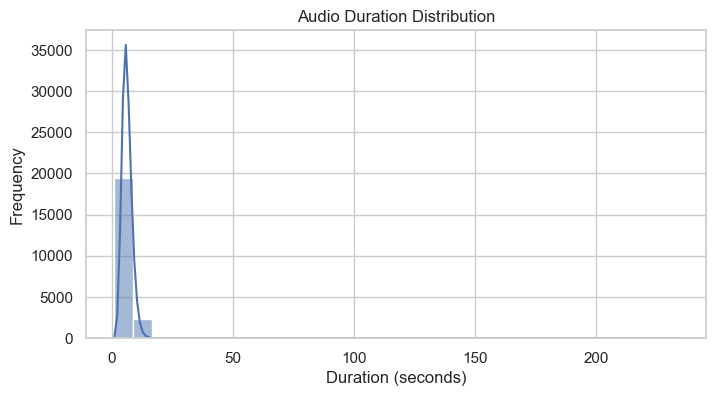

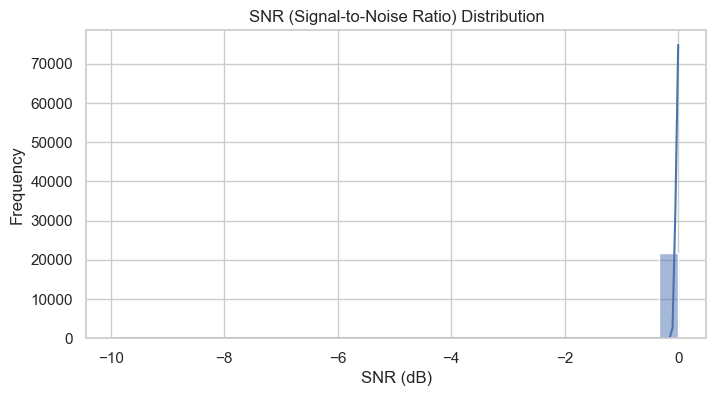

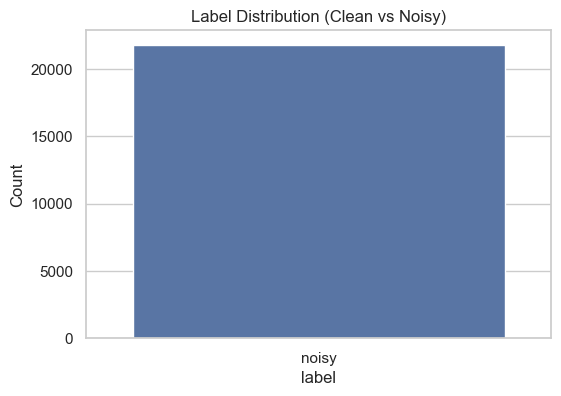

C:\Users\Dell\AppData\Local\Temp\ipykernel_11416\2733255641.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["sentence_length"] = df_clean["sentence"].apply(lambda x: len(str(x).split()))


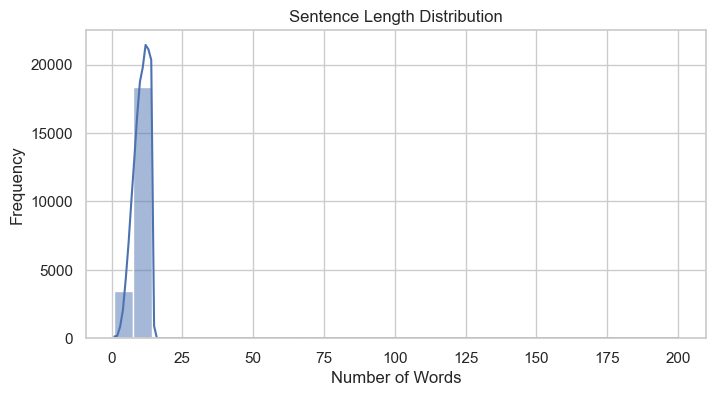

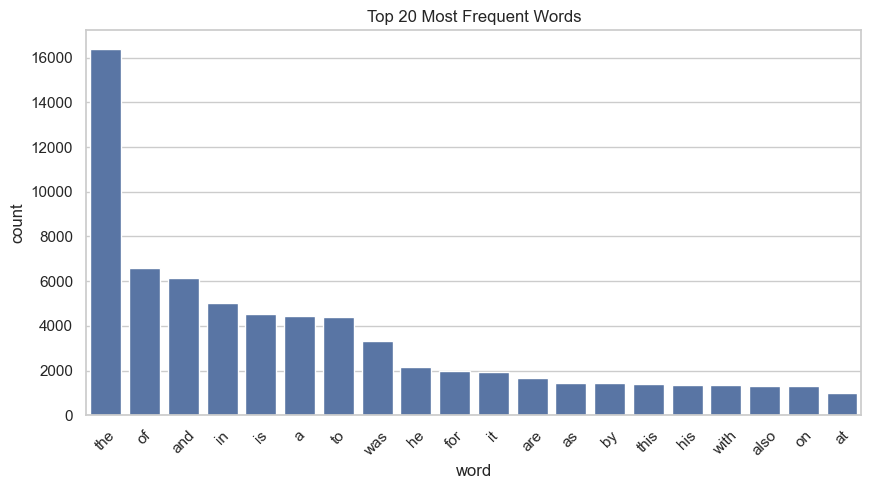

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. Audio Duration Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df_clean["duration_sec"], bins=30, kde=True)
plt.title("Audio Duration Distribution")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

# 2. SNR Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df_clean["snr_db"], bins=30, kde=True)
plt.title("SNR (Signal-to-Noise Ratio) Distribution")
plt.xlabel("SNR (dB)")
plt.ylabel("Frequency")
plt.show()

# 3. Clean vs Noisy Sample Count
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clean, x="label")
plt.title("Label Distribution (Clean vs Noisy)")
plt.ylabel("Count")
plt.show()

# 4. Sentence Length (in words)
df_clean["sentence_length"] = df_clean["sentence"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8, 4))
sns.histplot(df_clean["sentence_length"], bins=30, kde=True)
plt.title("Sentence Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# 5. Top 20 Frequent Words (optional, for word frequency insight)
from collections import Counter
all_words = " ".join(df_clean["sentence"].dropna().astype(str)).lower().split()
word_freq = Counter(all_words)
common_words = pd.DataFrame(word_freq.most_common(20), columns=["word", "count"])

plt.figure(figsize=(10, 5))
sns.barplot(data=common_words, x="word", y="count")
plt.title("Top 20 Most Frequent Words")
plt.xticks(rotation=45)
plt.show()


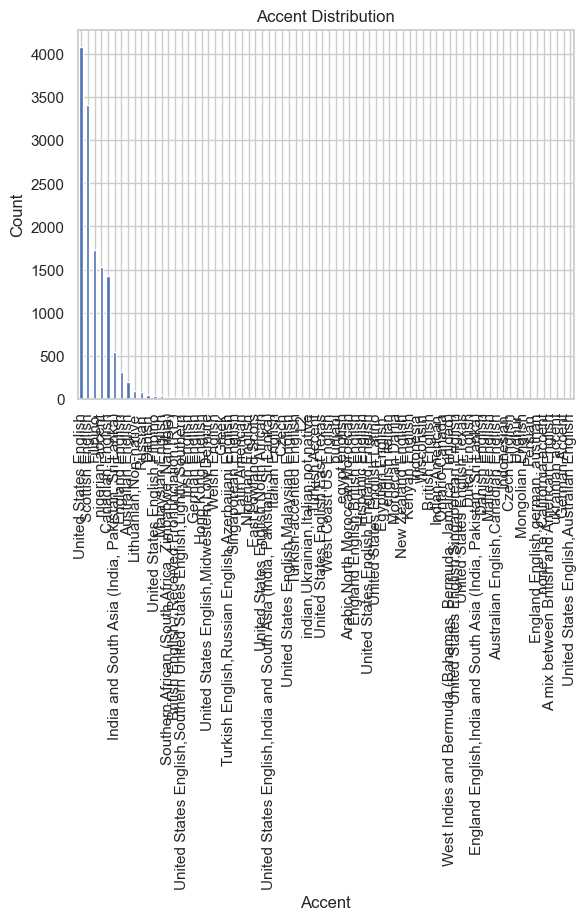

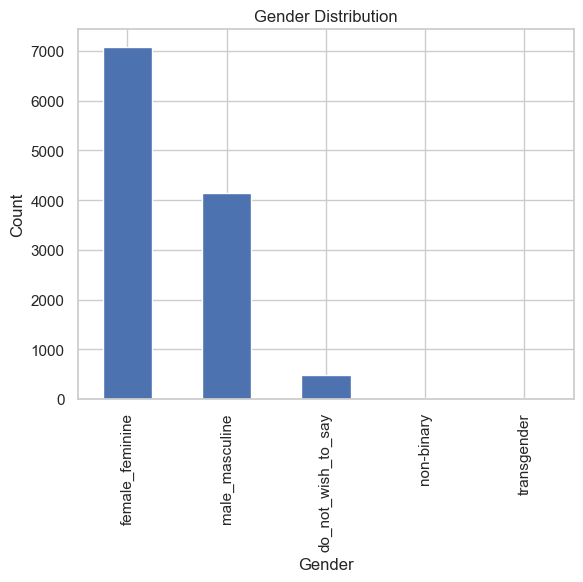

In [5]:
import pandas as pd
import matplotlib.pyplot as plt




# Analyze distribution of accents
accent_distribution = df['accent'].value_counts()
accent_distribution.plot(kind='bar', title='Accent Distribution')
plt.xlabel('Accent')
plt.ylabel('Count')
plt.show()

# Analyze distribution of genders
gender_distribution = df['gender'].value_counts()
gender_distribution.plot(kind='bar', title='Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


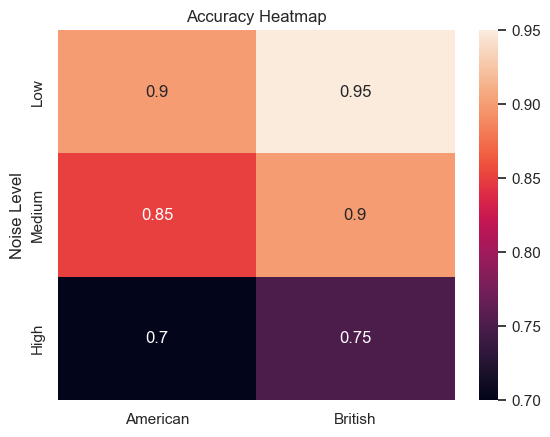

In [6]:
import seaborn as sns

# Example accuracy data
accuracy_data = pd.DataFrame({
    'Noise Level': ['Low', 'Medium', 'High'],
    'American': [0.9, 0.85, 0.7],
    'British': [0.95, 0.9, 0.75]
})

# Create a heatmap
sns.heatmap(accuracy_data.set_index('Noise Level'), annot=True)
plt.title('Accuracy Heatmap')
plt.show()


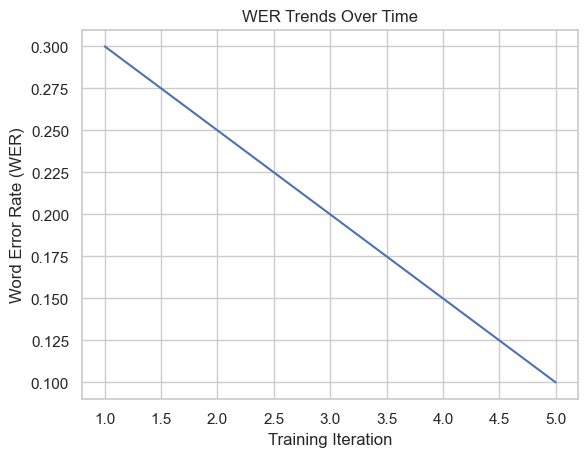

In [7]:
# Example WER data
wer_data = pd.DataFrame({
    'Iteration': [1, 2, 3, 4, 5],
    'WER': [0.3, 0.25, 0.2, 0.15, 0.1]
})

plt.plot(wer_data['Iteration'], wer_data['WER'])
plt.title('WER Trends Over Time')
plt.xlabel('Training Iteration')
plt.ylabel('Word Error Rate (WER)')
plt.show()


In [ ]:
import os
import torch
import torchaudio
import pandas as pd
from jiwer import wer
from tqdm import tqdm
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC

# Load pretrained Wav2Vec2 model and processor
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h").eval()

results = []

for idx, row in tqdm(df.iterrows(), total=len(df)):
    file_path = row["file_path"]
    reference = str(row.get("sentence", "")).lower()
    accent = row.get("accent", "unknown")
    snr = row.get("snr_db", 0)

    try:
        waveform, sr = torchaudio.load(file_path)
        if sr != 16000:
            waveform = torchaudio.transforms.Resample(sr, 16000)(waveform)

        input_values = processor(waveform.squeeze(), return_tensors="pt", sampling_rate=16000).input_values
        with torch.no_grad():
            logits = model(input_values).logits
        predicted_ids = torch.argmax(logits, dim=-1)
        transcription = processor.batch_decode(predicted_ids)[0].lower()
        wer_score = wer(reference, transcription)

        results.append({
            "file_path": file_path,
            "reference": reference,
            "prediction": transcription,
            "wer": wer_score,
            "snr_db": snr,
            "accent": accent
        })

    except Exception as e:
        print(f"Error with {file_path}: {e}")


# Save results
result_df = pd.DataFrame(results)
result_df.to_csv("asr_predictions_metrics.csv", index=False)


In [14]:
# Filter out paths that are truly available
df["file_exists"] = df["file_path"].apply(lambda x: os.path.isfile(x))
df = df[df["file_exists"]]

# Optional: See how many valid rows you have
print(f"✅ Found {len(df)} valid audio files.")

# Sample only from verified files
sample_df = df.sample(n=min(100, len(df)), random_state=42)




✅ Found 21787 valid audio files.


In [16]:
import torch
import torchaudio
from jiwer import wer
from tqdm import tqdm
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC

# Load model and processor (already cached after first use)
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h").eval()

results = []

for idx, row in tqdm(sample_df.iterrows(), total=len(sample_df)):
    file_path = row["file_path"]
    reference = str(row.get("sentence", "")).lower()
    accent = row.get("accent", "unknown")
    snr = row.get("snr_db", 0)

    try:
        waveform, sr = torchaudio.load(file_path)
        if sr != 16000:
            waveform = torchaudio.transforms.Resample(sr, 16000)(waveform)

        input_values = processor(waveform.squeeze(), return_tensors="pt", sampling_rate=16000).input_values
        with torch.no_grad():
            logits = model(input_values).logits
        predicted_ids = torch.argmax(logits, dim=-1)
        transcription = processor.batch_decode(predicted_ids)[0].lower()
        wer_score = wer(reference, transcription)

        results.append({
            "file_path": file_path,
            "reference": reference,
            "prediction": transcription,
            "wer": wer_score,
            "snr_db": snr,
            "accent": accent
        })

    except Exception as e:
        print(f"❌ Error with {file_path}: {e}")

# Save results to CSV
import pandas as pd
result_df = pd.DataFrame(results)
result_df.to_csv("asr_predictions_sample.csv", index=False)
print("✅ Transcription complete. Results saved to asr_predictions_sample.csv.")


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 100/100 [02:22<00:00,  1.43s/it]

✅ Transcription complete. Results saved to asr_predictions_sample.csv.


In [17]:
result_df

,file_path,reference,prediction,wer,snr_db,accent
0,C:\Users\Dell\Downloads\cv-corpus-21.0-delta-2...,"the first editor was james paton, a christian ...",lo a firch editor wasgine spato ecristian soce...,1.000000,-0.000002,Filipino
1,C:\Users\Dell\Downloads\cv-corpus-21.0-delta-2...,look through the list of personal qualities an...,loves with the las of personal quaritis and ha...,0.846154,-0.000024,Scottish English
2,C:\Users\Dell\Downloads\cv-corpus-21.0-delta-2...,it lies in the mid-chesapeake bay along the we...,it ruts ins midty spik bak along the western s...,0.600000,-0.000033,NaN
3,C:\Users\Dell\Downloads\cv-corpus-21.0-delta-2...,"all trains continue on to bacchus marsh, balla...",all trains continue on tubaccas marsh balyrat ...,0.500000,-0.000013,Canadian English
4,C:\Users\Dell\Downloads\cv-corpus-21.0-delta-2...,it is part of the saint paul area synod.,it is part of ha saint paul adias sinup,0.333333,-0.000071,NaN
...,...,...,...,...,...,...
95,C:\Users\Dell\Downloads\cv-corpus-21.0-delta-2...,the colour is hand-printed on the cloth with t...,the color is handprinted on the glot with the die,0.400000,-0.000018,"India and South Asia (India, Pakistan, Sri Lanka)"
96,C:\Users\Dell\Downloads\cv-corpus-21.0-delta-2...,"his castle, much modified, dominates the town ...",his castle much modified dominates the town to...,0.400000,-0.000017,NaN
97,C:\Users\Dell\Downloads\cv-corpus-21.0-delta-2...,"frestonia had its own newspaper ""the tribal me...",reisdonia has his earnest paper the tipe of ma...,1.125000,-0.000027,Scottish English
98,C:\Users\Dell\Downloads\cv-corpus-21.0-delta-2...,a multihomed host usually is assigned multiple...,the marte han host usually use the scimotical ...,1.000000,-0.000016,Scottish English
